In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
autoencoder_original = np.load('drive/MyDrive/Colab Notebooks/autoencoder_original.npy')
autoencoder_corrupted = np.load('drive/MyDrive/Colab Notebooks/autoencoder_corrupted.npy')

In [ ]:
autoencoder_corrupted = np.squeeze(autoencoder_corrupted, axis=-1)
print(autoencoder_original.shape)
print(autoencoder_corrupted.shape)

(60000, 28, 28)
(60000, 28, 28)


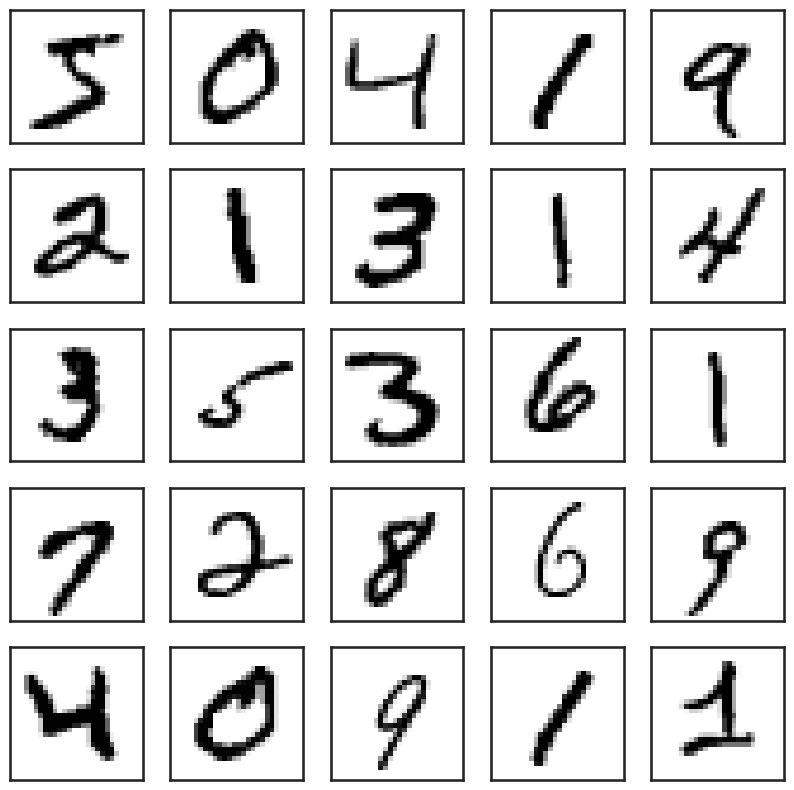

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(autoencoder_original[i], cmap=plt.cm.binary)
plt.show()

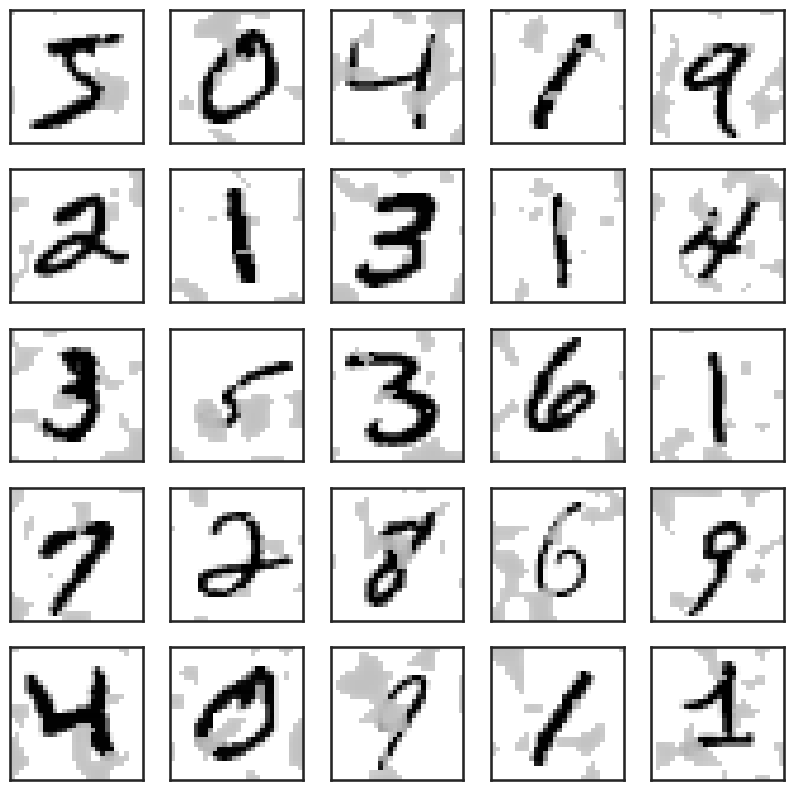

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):  # Visualize 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(autoencoder_corrupted[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
original_train, original_test = train_test_split(autoencoder_original, test_size=0.2, random_state=42)
corrupted_train, corrupted_test = train_test_split(autoencoder_corrupted, test_size=0.2, random_state=42)

In [ ]:
original_train = original_train.astype('float32') / 255.0
original_test = original_test.astype('float32') / 255.0

corrupted_train = corrupted_train.astype('float32') / 255.0
corrupted_test = corrupted_test.astype('float32') / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape


input_shape = (28, 28)
autoencoder = Sequential()

# Encoder
autoencoder.add(Flatten(input_shape=input_shape))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))

# Decoder
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))
autoencoder.add(Reshape(input_shape))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Summary of the model
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218

In [ ]:
history  = autoencoder.fit(original_train, corrupted_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(original_test, corrupted_test))

Epoch 1/50
750/750 [==============================] - 4s 4ms/step - loss: 0.2653 - val_loss: 0.2291
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2227 - val_loss: 0.2188
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2165 - val_loss: 0.2157
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2138 - val_loss: 0.2133
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2120 - val_loss: 0.2119
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2108 - val_loss: 0.2115
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2101 - val_loss: 0.2106
Epoch 8/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2094 - val_loss: 0.2097
Epoch 9/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2088 - val_loss: 0.2097
Epoch 10/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2083 - val_loss: 0.2094

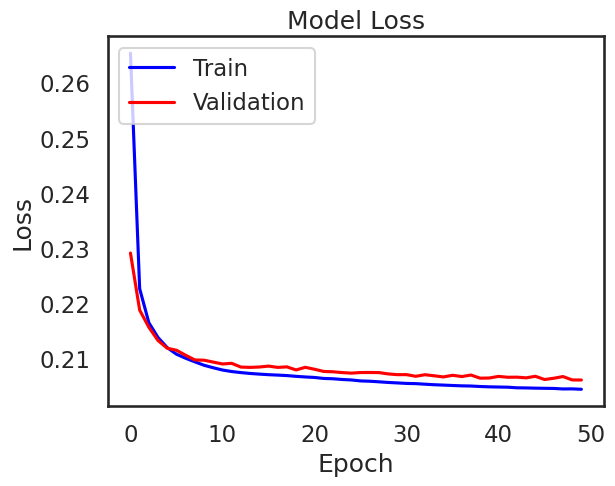

In [ ]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
reconstructed_images = autoencoder.predict(corrupted_test)

375/375 [==============================] - 1s 2ms/step


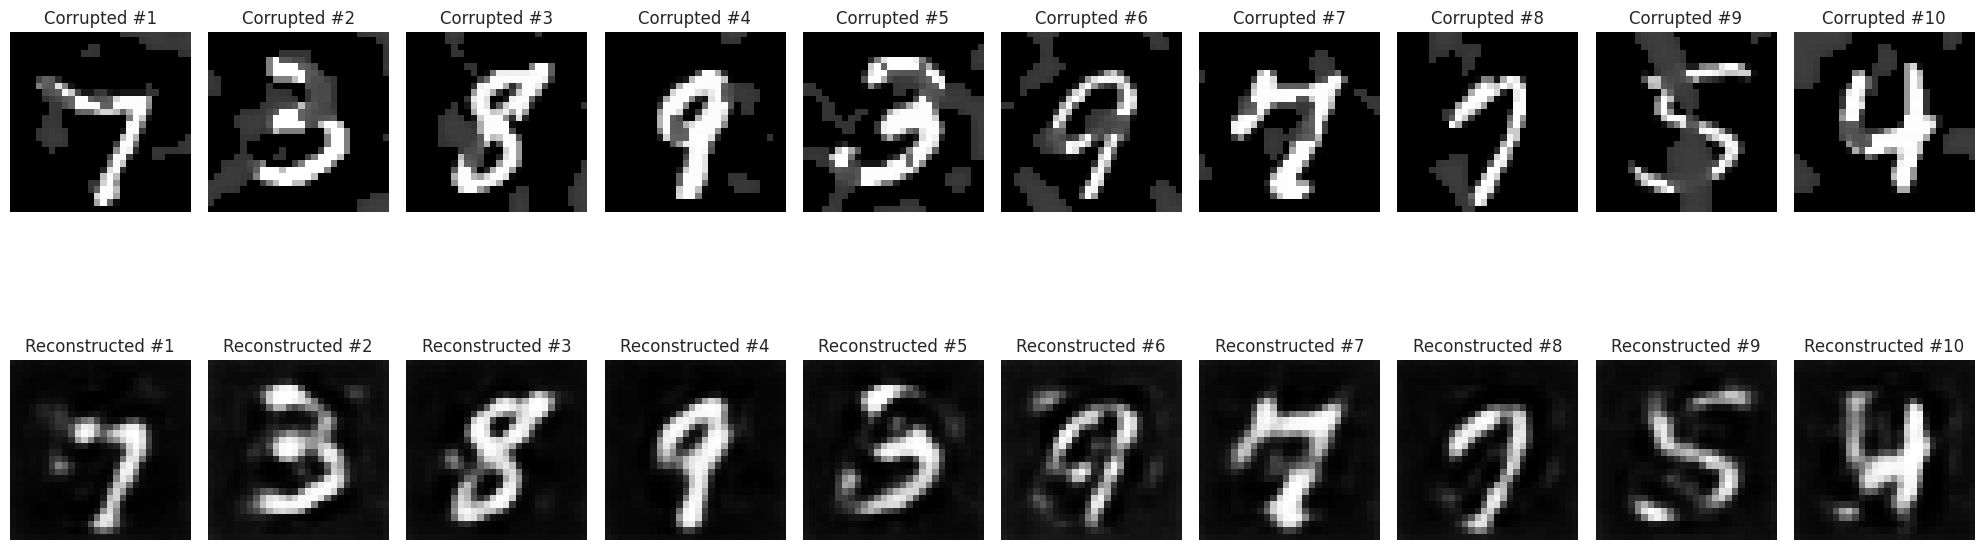

In [ ]:
import seaborn as sns
n = 10
sns.set(style="whitegrid", context="notebook", palette="pastel")
plt.figure(figsize=(20, 8))

for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(corrupted_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Corrupted #{i+1}")
    plt.axis('off')  # Turn off axis

    # Display reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Reconstructed #{i+1}")
    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [ ]:
corrupted_test.shape

(12000, 28, 28)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Output the model summary
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)          9248

In [ ]:
history1  = autoencoder.fit(original_train, corrupted_train,
                epochs=150,
                batch_size=64,
                shuffle=True,
                validation_data=(original_test, corrupted_test))

Epoch 1/150
750/750 [==============================] - 7s 7ms/step - loss: 0.2256 - val_loss: 0.2039
Epoch 2/150
750/750 [==============================] - 4s 5ms/step - loss: 0.2017 - val_loss: 0.2010
Epoch 3/150
750/750 [==============================] - 4s 5ms/step - loss: 0.1998 - val_loss: 0.2012
Epoch 4/150
750/750 [==============================] - 4s 5ms/step - loss: 0.1987 - val_loss: 0.1992
Epoch 5/150
750/750 [==============================] - 5s 7ms/step - loss: 0.1980 - val_loss: 0.1985
Epoch 6/150
750/750 [==============================] - 4s 5ms/step - loss: 0.1975 - val_loss: 0.1977
Epoch 7/150
750/750 [==============================] - 4s 5ms/step - loss: 0.1970 - val_loss: 0.1976
Epoch 8/150
750/750 [==============================] - 4s 6ms/step - loss: 0.1967 - val_loss: 0.1982
Epoch 9/150
750/750 [==============================] - 5s 7ms/step - loss: 0.1964 - val_loss: 0.1968
Epoch 10/150
750/750 [==============================] - 4s 5ms/step - loss: 0.1962 - val_lo

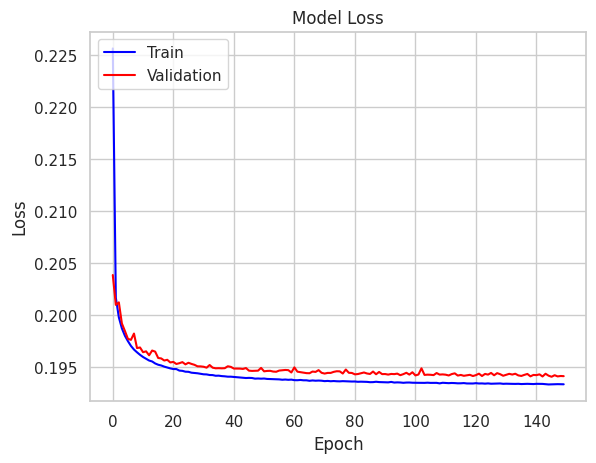

In [ ]:
plt.plot(history1.history['loss'], color = 'blue')
plt.plot(history1.history['val_loss'], color = 'red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
reconstructed_images_cov = autoencoder.predict(corrupted_test)

375/375 [==============================] - 1s 2ms/step


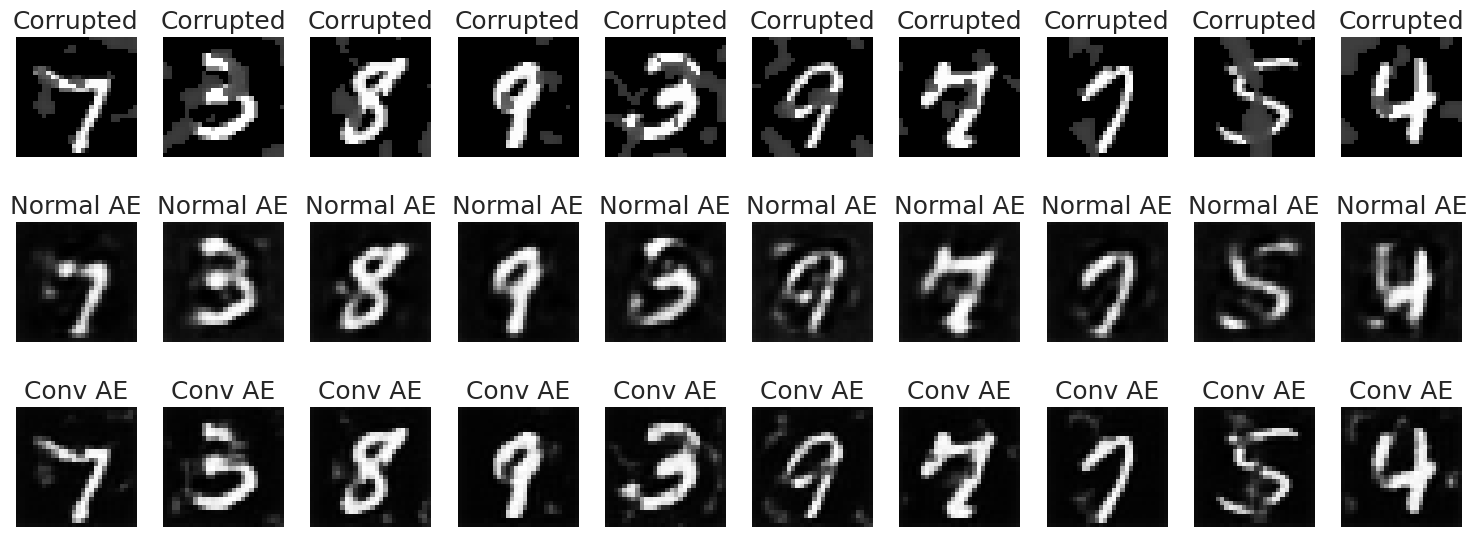

In [ ]:
n = 10  # Number of images to display
sns.set(style="white", context="talk")

plt.figure(figsize=(15, 6))  # Adjust the size as needed

for i in range(n):
    # Display corrupted image
    plt.subplot(3, n, i + 1)
    plt.imshow(corrupted_test[i].reshape(28, 28), cmap='gray')
    plt.title("Corrupted")
    plt.axis('off')

    # Display normal autoencoder reconstructed image
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Normal AE")
    plt.axis('off')

    # Display convolutional autoencoder reconstructed image
    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructed_images_cov[i].reshape(28, 28), cmap='gray')
    plt.title("Conv AE")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
corrupted_test = np.expand_dims(corrupted_test, axis=-1)
reconstructed_images = np.expand_dims(reconstructed_images, axis = -1)


In [ ]:
mse = np.mean(np.power(corrupted_test - reconstructed_images_cov, 2), axis=(1, 2, 3))
average_mse = np.mean(mse)
print(f"Average Reconstruction Error for COV AE(MSE): {average_mse}")

mse = np.mean(np.power(corrupted_test - reconstructed_images, 2), axis=(1, 2, 3))
average_mse = np.mean(mse)
print(f"Average Reconstruction Error for Normal AE(MSE): {average_mse}")

Average Reconstruction Error for COV AE(MSE): 0.004910115152597427
Average Reconstruction Error for Normal AE(MSE): 0.017191795632243156
